# 단 2줄의 코드로 machine learning model 40개 적용하기

출처: [https://medium.com/@fareedkhandev/apply-40-machine-learning-models-in-two-lines-of-code-c01dad24ad99](https://medium.com/@fareedkhandev/apply-40-machine-learning-models-in-two-lines-of-code-c01dad24ad99)

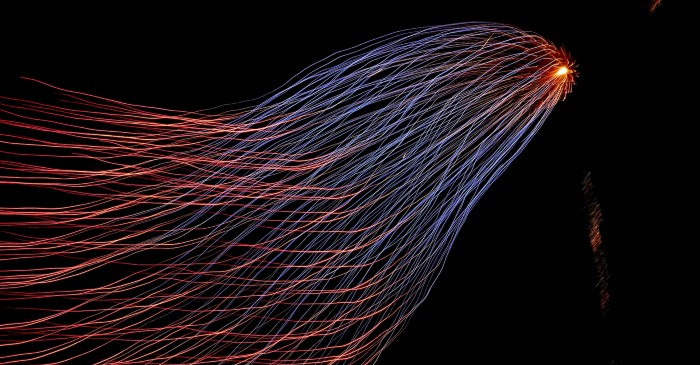

사용할 라이브러리에는 ML taks에 일반적으로 사용하는 특정 버전의 라이브러리가 필요하기 때문에 이 tasks에 **google colab** 또는 **Kaggle**을 사용하는 것이 좋습니다.

여기서는 한 줄의 코드로 데이터 세트에 많은 ML 모델을 구현할 수 있는 ```lazypredict``` 라이브러리를 사용할 것입니다. 이를 통해 데이터 세트에 적합한 모델에 대한 간략한 이해를 얻을 수 있습니다.

# Step 1
```lazypredict``` library를 사용하기 위해 설치해줍니다.

In [6]:
# !pip install lazypredict --user

# Step 2
pandas를 import합니다.

In [12]:
import pandas as pd

# Step 3
데이터세트를 로드합니다. tirthajyoti의 GitHub 계정에서 사용할 수 있는 데이터 세트를 사용하고 있습니다.

In [13]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv",
                           filename="Mall_Customers.csv")

('Mall_Customers.csv', <http.client.HTTPMessage at 0x2256e271790>)

In [14]:
df = pd.read_csv("Mall_Customers.csv")

# Step 4
dataset를 간단히 print해봅니다.

In [17]:
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


여기서 Y는 Spending Score 칼럼이고, 나머지 칼럼은 X입니다.

이제 X와 Y가 무엇인지 식별한 후, training 데이터 세트와 테스트 데이터 세트로 나눠 보겠습니다.

In [19]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns!= "Spending Score (1-100)"]
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 5
```lazypredict``` 라이브러리 내부에 두 개의 클래스가 있습니다. 하나는 Classification용이고, 두 번째 클래스는 Regression용입니다.

In [20]:
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

여기서는 Regression 문제이기 때문에 LazyRegressor를 사용합니다.

In [21]:
multiple_ML_model = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)

models, predictions = multiple_ML_model.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 45.38it/s]


여기서 ```predictions=True```는 각 모델의 정확도를 얻고, 모든 모델의 예측을 원한다는 의미입니다.

models 변수에는 다른 중요한 정보와 함께 모든 모델 정확도가 포함됩니다.

In [23]:
print(models.shape)
models

(42, 4)


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.17,0.23,20.53,0.02
KNeighborsRegressor,0.16,0.22,20.63,0.01
AdaBoostRegressor,0.09,0.15,21.59,0.03
HistGradientBoostingRegressor,0.04,0.10,22.13,0.06
OrthogonalMatchingPursuitCV,-0.02,0.05,22.82,0.01
OrthogonalMatchingPursuit,-0.02,0.05,22.82,0.01
LassoLarsIC,-0.03,0.04,22.95,0.01
Lasso,-0.04,0.03,23.00,0.01
LassoCV,-0.04,0.03,23.01,0.04


보시다시피, 이 가이드는 정확도 향상보다 많은 모델을 테스트하는 방법에 더 중점을 두고 있기 때문에 regression 문제에 42개의 ML 모델을 구현했습니다.

모든 모델의 예측을 봅시다.

In [24]:
predictions

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GammaRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,45.78,44.00,44.31,49.00,47.99,45.40,46.07,49.00,45.94,45.23,...,46.31,45.04,43.54,43.78,43.42,47.33,43.52,45.74,47.04,43.93
1,63.56,65.60,59.41,92.00,47.99,56.24,53.59,6.00,61.21,54.89,...,66.98,69.02,61.55,60.97,62.08,52.95,61.54,55.09,74.85,69.11
2,45.78,42.50,43.99,35.00,47.99,44.70,45.71,48.00,47.27,45.04,...,38.99,44.96,43.34,43.45,43.16,45.30,43.40,45.52,43.24,36.01
3,46.63,32.80,48.15,35.00,47.99,47.94,48.05,13.00,40.50,47.50,...,38.76,41.59,48.29,48.20,48.27,46.54,48.34,48.06,40.60,58.63
4,45.78,51.50,44.69,55.00,47.99,44.98,45.64,46.00,50.74,45.48,...,58.68,49.47,43.71,44.13,43.98,46.27,43.61,46.05,52.39,45.13
5,50.76,29.40,56.80,10.00,47.99,55.34,53.48,69.00,16.10,52.99,...,25.65,33.21,59.30,58.24,58.84,50.32,59.57,53.28,30.21,38.68
6,35.83,18.90,39.74,4.00,47.99,41.61,43.12,35.00,16.65,42.68,...,61.63,12.92,37.85,38.49,37.76,45.36,37.77,43.02,8.90,23.93
7,51.18,38.40,57.43,41.00,47.99,55.57,53.39,41.00,45.30,53.47,...,45.56,40.05,59.47,58.81,59.56,51.93,59.53,53.77,37.86,49.22
8,51.18,23.50,48.75,18.00,47.99,49.53,49.69,18.00,19.52,47.90,...,16.60,33.18,47.80,48.70,48.91,47.70,47.33,48.34,19.07,58.83
9,57.05,69.80,49.40,85.00,47.99,49.26,49.34,85.00,65.07,48.25,...,19.22,59.79,49.71,49.64,49.85,47.34,49.70,48.74,37.28,63.01


이러한 예측을 사용하여 confusion matrix를 만들 수 있습니다.

# Conclusions
lazypredict는 어떤 모델이 우리의 데이터 세트에 높은 성능을 보이는지 간단히 확인할 수 있고, 정확도 상위 몇개의 모델을 이용해 튜닝 과정을 거친다면 적합한 모델을 도출해내는데 도움이 될 것입니다.